In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from minisom import MiniSom    

(1000, 3)
Star ID:  0.0 , lat: 30.15380042575761 , len:  48.77959777831914
Star ID:  1.0 , lat: 53.09410539088561 , len:  229.89408578673624
Star ID:  2.0 , lat: 8.555192403994507 , len:  333.8008024337728
Star ID:  3.0 , lat: 278.07914960541865 , len:  238.42584183424214
Star ID:  4.0 , lat: 132.52532060686443 , len:  230.32878752816325


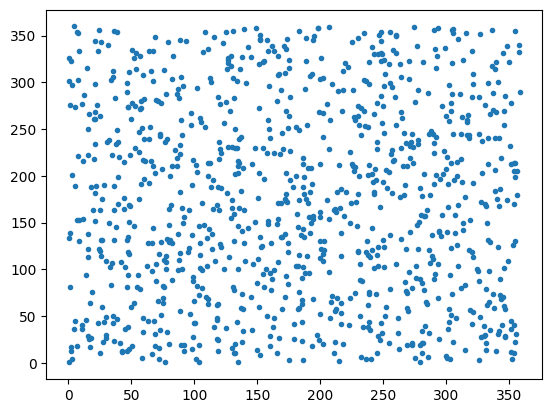

In [2]:
#  Create a set of random stars in range [360,360]
n_stars = 1000

# Create the set of points
x = np.random.uniform(0, 360, n_stars)
y = np.random.uniform(0, 360, n_stars)
stars_id = np.linspace(0,n_stars-1,n_stars, dtype=int)

stars_data = np.array( np.transpose([x,y, stars_id]))

print(stars_data.shape)

for i in range(5):
    print("Star ID: ", stars_data[i][2], ", lat:", stars_data[i][0], ", len: ", stars_data[i][1])

plt.figure()
plt.plot(x,y,'.')
plt.show()

In [4]:
from scipy.spatial import KDTree

# Create the k-d tree to find the nearest neighborhoods of the center stars
# As this is used only for the training of the SOM performace is not needed 
tree = KDTree(stars_data[:,:2])

n_of_neighbor = 4 # Number of neighborhoods stars used to compute the features 

# Find the 5 closest neighbors for each star
distances, indices = tree.query(stars_data[:,:2], k=n_of_neighbor+1)

features_vec = []

# Compute the distances in the x and y axes to each of the five closest stars for each star
for i in range(len(stars_data)):
    print("Star ID:", stars_data[i][2], "(","%0.2f" % stars_data[i][0],",","%0.2f" %stars_data[i][1],")")
    features = []
    for j in range(1,n_of_neighbor+1):
        neighbor_index = indices[i][j]
        x_distance = stars_data[neighbor_index][0] - stars_data[i][0]
        y_distance = stars_data[neighbor_index][1] - stars_data[i][1]
        print("Neighbor ID:", stars_data[neighbor_index][2], "(","%0.2f" %stars_data[neighbor_index][0],",","%0.2f" %stars_data[neighbor_index][1],")", ", x-distance:", x_distance, ", y-distance:", y_distance)
        
        #  Define the features vector that is going to be used in the SOM:
        # TODO: Try diferent combinations of features to set the most efective one 

        # features = [ x1-x2, y1-y2, x1-x3, y1-y3, ..., x1-x_n, y1-y_n]
        features.append(x_distance)
        features.append(y_distance)

        # fetaures = [ r1 * r2, r1*r3, r1*r_n]
        # features.append(np.array(stars_data[neighbor_index][0] * stars_data[i][0] 
                        # + stars_data[neighbor_index][1] * stars_data[i][1]) )
        
        # Inter neighbor features 
        # features = [ x2-x3, y2-y3, x2-x4, y2-y4, ..., x_m-x_n, y_m-y_n]
        # for k in range(1,n_of_neighbor+1-j):
        #     features.append()


    print("Number of features: ",len(features))
    features_vec.append(features)

Star ID: 0.0 ( 30.15 , 48.78 )
Neighbor ID: 477.0 ( 35.08 , 50.14 ) , x-distance: 4.925940769358789 , y-distance: 1.3572694797627634
Neighbor ID: 226.0 ( 28.31 , 43.50 ) , x-distance: -1.841056412786429 , y-distance: -5.275306590340783
Neighbor ID: 819.0 ( 35.09 , 42.50 ) , x-distance: 4.932189439392069 , y-distance: -6.278768127934022
Neighbor ID: 396.0 ( 38.32 , 47.18 ) , x-distance: 8.162374173575358 , y-distance: -1.5994519353765284
Number of features:  8
Star ID: 1.0 ( 53.09 , 229.89 )
Neighbor ID: 57.0 ( 56.39 , 225.39 ) , x-distance: 3.29406901612505 , y-distance: -4.50448785931971
Neighbor ID: 315.0 ( 49.21 , 222.06 ) , x-distance: -3.8813988093945966 , y-distance: -7.830726895633859
Neighbor ID: 202.0 ( 60.05 , 239.48 ) , x-distance: 6.952671683389603 , y-distance: 9.581758733162786
Neighbor ID: 11.0 ( 63.98 , 239.00 ) , x-distance: 10.887384590207617 , y-distance: 9.101592821185847
Number of features:  8
Star ID: 2.0 ( 8.56 , 333.80 )
Neighbor ID: 429.0 ( 0.23 , 325.86 ) , x-

In [29]:
import numpy as np
from minisom import MiniSom

features_vec = np.array(features_vec) # Transform to array
star_features = features_vec

# Normalize the data -> better performace of the SOM 
star_features_normalized = (star_features - star_features.min(axis=0)) / (star_features.max(axis=0) - star_features.min(axis=0))

# Define the SOM parameters

# Must be more neurons that points -> sqrt of data size to set the mesh: data < som_rows * som_cols
mesh_dim = np.int(np.sqrt(features_vec.shape[0]))

som_rows = mesh_dim 
som_columns = mesh_dim
input_len = star_features.shape[1]

# Initialize the SOM
#TODO optimize hiperparameters 
som = MiniSom(som_rows, som_columns, input_len, sigma=1.0, learning_rate=0.7, neighborhood_function='gaussian')
# Train the SOM
som.train_random(data=star_features_normalized, num_iteration=100000, verbose= True)


# Create a dictionary to store the star ID for each grid position
star_ids = {tuple(map(int, pos)): star_id for pos, star_id in zip(som.win_map(star_features_normalized), range(1, len(star_features_normalized+1) ))}


/tmp/ipykernel_72778/2006913235.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mesh_dim = np.int(np.sqrt(features_vec.shape[0]))


 [ 100000 / 100000 ] 100% - 0:00:00 left 
 quantization error: 0.04689144441639016


In [13]:
# Check which features correspond to which neurons
som.win_map(star_features_normalized)


defaultdict(list,
            {(7,
              9): [array([0.60874762, 0.54933371, 0.4173047 , 0.33495933, 0.60498909,
                     0.3172162 , 0.54719624, 0.48515337])],
             (17,
              11): [array([0.55727564, 0.35592987, 0.35874421, 0.26495334, 0.65361585,
                     0.72113316, 0.59806468, 0.71780033])],
             (17,
              9): [array([0.19077513, 0.24249892, 0.28643179, 0.16943227, 0.85149014,
                     0.4767681 , 0.63147371, 0.75808388])],
             (0,
              20): [array([0.44429208, 0.36722229, 0.31144563, 0.41597182, 0.35846979,
                     0.6334658 , 0.3095458 , 0.35864724]), array([0.39082766, 0.40370936, 0.36796644, 0.33600168, 0.270039  ,
                     0.56377118, 0.25736507, 0.3796091 ])],
             (15,
              3): [array([0.49853993, 0.49870429, 0.3992663 , 0.504688  , 0.34779315,
                     0.49738032, 0.444379  , 0.70825023]), array([0.5031186 , 0.57650835, 0.3609

In [31]:
# Check that neurons correspond to a star, the rest of the neurons don't have any star ID set,
#  this also imply that there are some neurons with more than one star parameters stored 
# TODO: Optimice this number via features selection,hp tuning, or other  
print("Number of neurons with data:", len(star_ids))

# Another dict for map neurons to star (just to check), same as star_ids but created from som.winner rather than som.winner_map
star_dict = {}
for i in range(len(star_features_normalized)):
    star_dict[som.winner(star_features_normalized[i])] = i+1

print("Number of neurons without data:", len(star_features_normalized)-len(star_dict))
print("Total neurons:", som_columns*som_rows)

Number of neurons with data: 777
Number of neurons without data: 223
Total neurons: 961


Predicted Star ID: 344, actual star ID: 344


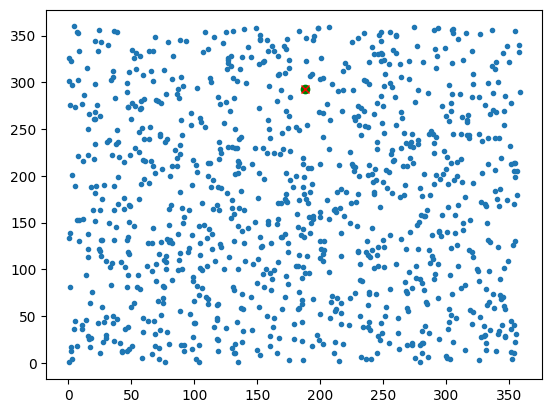

In [48]:
# Define a function to predict the star ID for a given feature vector
def predict_star_id(feature_vector, dictionary):
    normalized_feature = (feature_vector - star_features.min(axis=0)) / (star_features.max(axis=0) - star_features.min(axis=0))
    winner = som.winner(normalized_feature)
    if winner in dictionary:
        return dictionary[winner]
    else:
        return 0
# Test the prediction for a sample feature vector
random_id = np.random.randint(1,features_vec.shape[0])
sample_feature_vector = features_vec[random_id-1] 

random_noise = np.random.normal(loc=0, scale=1.0, size=features_vec.shape[1])
sample_feature_vector = sample_feature_vector - random_noise

predicted_star_id = predict_star_id(sample_feature_vector,star_dict)

print(f"Predicted Star ID: {predicted_star_id}, actual star ID: {random_id}")

plt.figure()
plt.plot(x,y,'.')
plt.plot(stars_data[random_id][0],stars_data[random_id][1],'og')
plt.plot(stars_data[predicted_star_id][0],stars_data[predicted_star_id][1],'xr')
plt.show()


In [132]:
cont = 0
for i in range(features_vec.shape[0]):
    sample_feature_vector = features_vec[i] 

    # Itroduce noise in the features vector to check the response of the SOM
    random_noise = np.random.normal(loc=0, scale=1.0, size=features_vec.shape[1])
    sample_feature_vector = sample_feature_vector - random_noise

    predicted_star_id = predict_star_id(sample_feature_vector,star_dict)
    if predicted_star_id == i +1: 
        cont = cont + 1 
print("total succes =",  cont / features_vec.shape[0],", succes over detected neurons =",  cont / len(star_ids))

total succes = 0.761 succes over detected neurons = 0.9947712418300654
